Olympics 2016
-------------
This notebook should track the progress of the 2016 Olympics using Wikipedea as a source of information.

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import datetime

Get the data!
---

In [43]:
r = requests.get("https://en.wikipedia.org/wiki/2016_Summer_Olympics_medal_table")
last_update = datetime.datetime.now()
last_update = last_update.strftime('%H:%M %a %d %b %Y')
print last_update, "Result:", r.status_code

09:19 Sat 13 Aug 2016 Result: 200


Parse the data
----

In [44]:
soup = BeautifulSoup(r.text, 'html.parser')
t = soup.find_all('table')
Medals = []
# Note that this depends on the current page layout - at the moment the table we are after is second
for row in t[1].findAll('tr')[1:-1]: # Skip first (header) & last (totals) rows
    vals = row.text.split('\n')  # Split the text value on line breaks 
    if len(vals) > 6:
        try:
            start = 1  # Most lines start on line 2
            if len(vals) == 8: # Some on line 3
                start = 2
            country, gold, silver, bronze, total = vals[start:-1] # Also skip the spare at the end
            country, code = country.split(u'\xa0')[1:]  # For some reason the countries are u'\xa0Name\xa0(code)'
            Medals.append([country, code[1:-1].replace(')',''),  # Country and code without brackets
                           int(gold), int(silver), int(bronze), int(total) # Medals
                          ])
        except ValueError, e:  # Just in case!
            print "Problem", vals, country, e
try:
    countries = [x[0] for x in Medals]
    codes = [x[1] for x in Medals]
    gold = [x[2] for x in Medals]
    silver = [x[3] for x in Medals]
    bronze = [x[4] for x in Medals]
    total = [x[5] for x in Medals]
except IndexError, e:  # May not need this any more
    print x, e
# Just so I can keep track of team GB
gb = codes.index(u'GBR')
print countries[gb], codes[gb], gold[gb], silver[gb], bronze[gb], total[gb]

Great Britain GBR 7 9 6 22


Simple Plot Of The Data
----

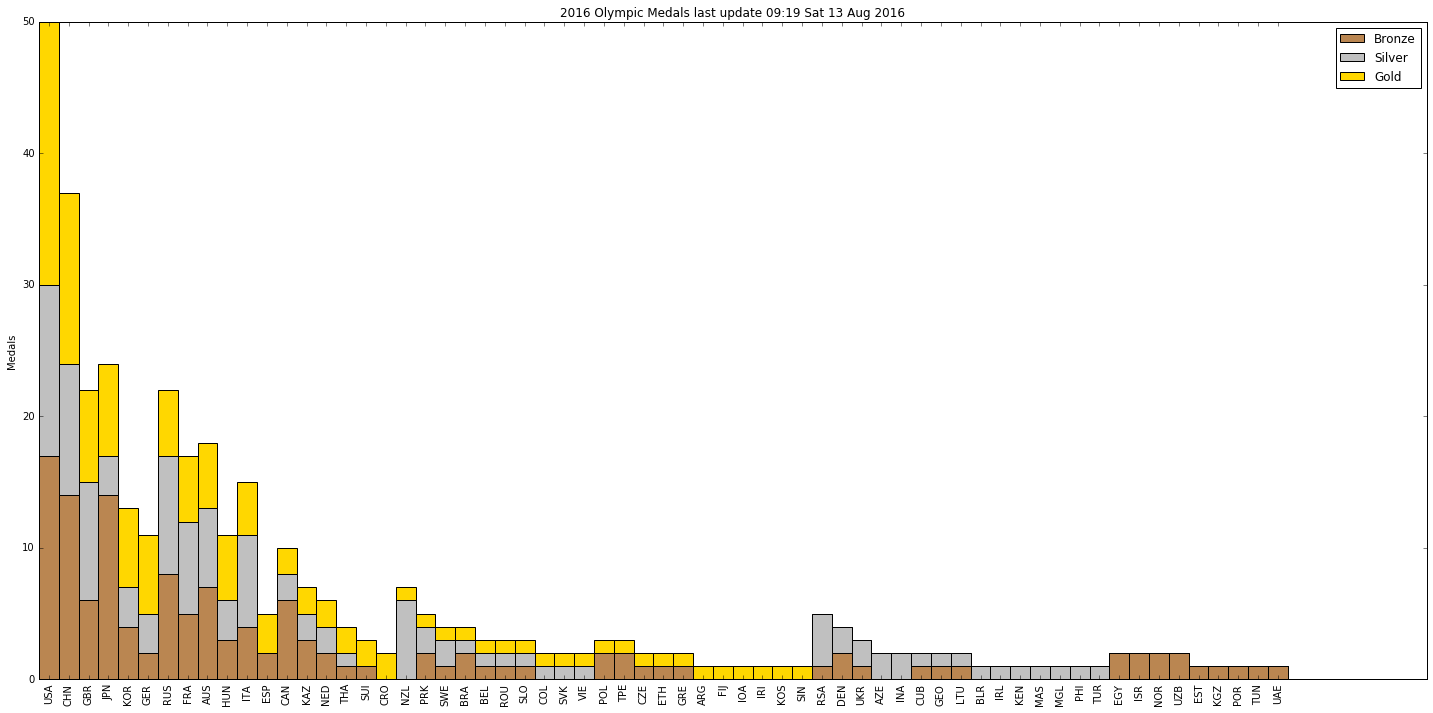

In [45]:
def PlotIt(Medals, extraline=None):
    """ Plot the data that you have the extraline data must be a dictionary of country codes v values."""
    countries = [x[0] for x in Medals]
    codes = [x[1] for x in Medals]
    gold = [x[2] for x in Medals]
    silver = [x[3] for x in Medals]
    bronze = [x[4] for x in Medals]
    total = [x[5] for x in Medals]
    if extraline:
        try:
            line = [extraline[c] for c in codes]
        except IndexError, e:
            print e, c
                    
    matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
    ind = range(len(codes))    # the x locations for the groups
    width = 1.0       # the width of the bars: can also be len(x) sequence

    bm = plt.bar(ind, bronze, width=width, color='#BA8651')
    sm = plt.bar(ind, silver, width=width, color='#C0C0C0', bottom=bronze)
    gb = [bronze[i]+silver[i] for i in ind]
    gm = plt.bar(ind, gold, width=width, color='#FFD700', bottom=gb)
    if extraline:
        el = plt.plot([i+width/2. for i in ind], line, color='k')

    plt.ylabel('Medals')
    plt.title('2016 Olympic Medals last update %s' % last_update)
    plt.xticks([i+width/2. for i in ind], codes)
    plt.xticks(rotation=90)
    plt.legend((bm[0], sm[0], gm[0]), ('Bronze', 'Silver', 'Gold'))
    plt.tight_layout(h_pad=2.0)
    plt.show()
PlotIt(Medals)

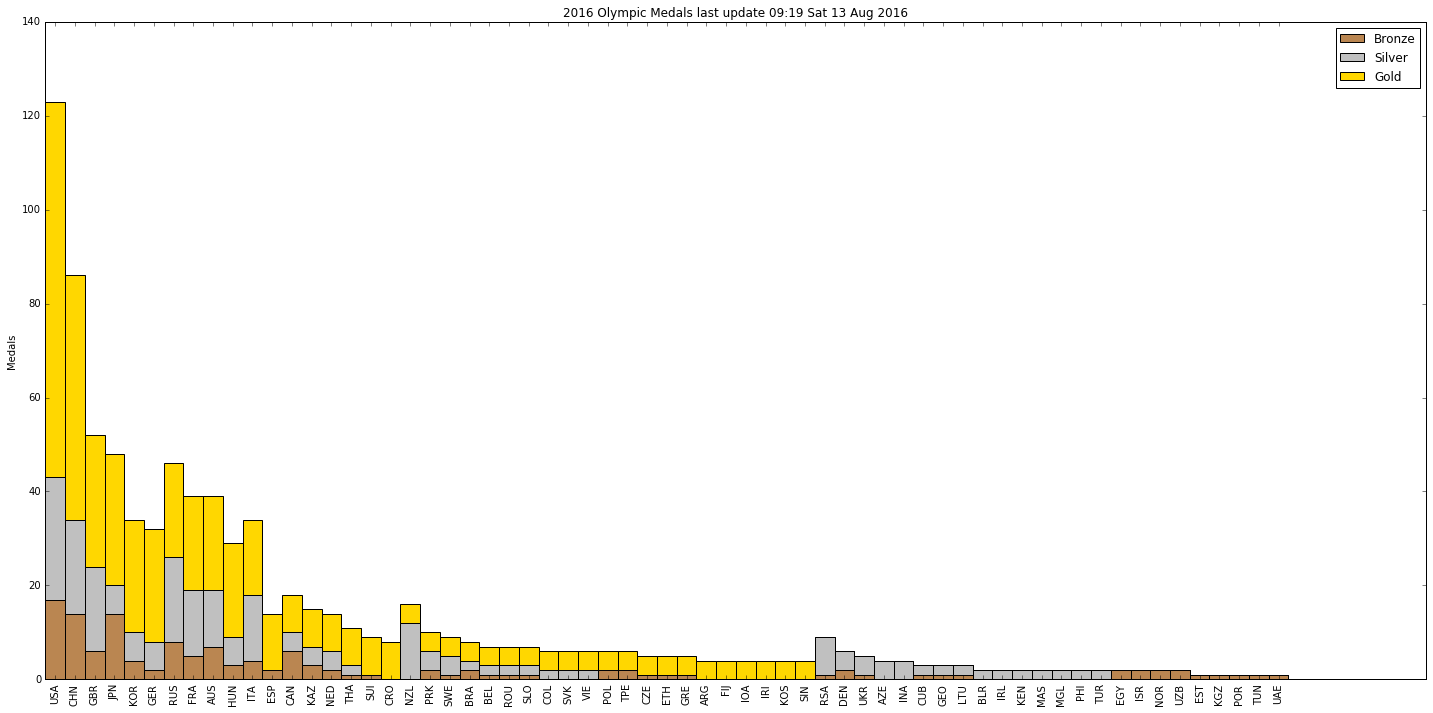

In [46]:
weighted = []
for x in Medals:
    weighted.append((x[0], x[1], x[2]*4, x[3]*2, x[4], x[2]*4 + x[3]*2 + x[4]))
PlotIt(weighted)

In [47]:
Teams = {
    "USA":554, "BRA":465, "GER":425, "AUS":421, "CHN":413, "FRA":395, "GBR":366, 
    "JPN":338, "CAN":314, "ITA":309, "ESP":306, "RUS":265, "POL":243, "NED":242, 
    "ARG":213, "KOR":205, "UKR":203, "NZL":199, "HUN":160, "SWE":152, "COL":147, 
    "RSA":137, "MEX":125, "IND":124, "DEN":122, "BLR":121, "CUB":120, "EGY":120, 
    "BEL":108, "CZE":105, "KAZ":104, "SRB":104, "SUI":104, "TUR":103, "ROU":97, 
    "GRE":95, "POR":92, "KEN":89, "CRO":87, "VEN":87, "IRL":77, "NGR":75, 
    "AUT":71, "UZB":70, "JAM":68, "ALG":67, "LTU":67, "IRI":64, "NOR":62, 
    "SLO":61, "TUN":61, "TPE":60, "AZE":56, "FIN":56, "THA":54, "BUL":51, 
    "FIJ":51, "MAR":51, "SVK":51, "ISR":48, "EST":45, "MGL":43, "CHI":42, 
    "PUR":42, "GEO":39, "ECU":38, "HKG":38, "QAT":38, "BRN":35, "PRK":35, 
    "ETH":34, "LAT":34, "MNE":34, "ARM":33, "MAS":32, "TTO":32, "ZIM":31, 
    "DOM":29, "PER":29, "BAH":28, "INA":28, "HON":26, "ANG":25, "SIN":25, 
    "CMR":24, "IRQ":23, "MDA":23, "VIE":23, "SEN":22, "GUA":21, "UGA":21, 
    "KGZ":19, "URU":17, "CYP":16, "GHA":14, "PHI":13, "UAE":13, "BAR":12, 
    "BOL":12, "BOT":12, "ERI":12, "CIV":12, "MRI":12, "KSA":12, "BIH":11, 
    "PAR":11, "CGO":10, "CRC":10, "HAI":10, "LUX":10, "NAM":10, "PAN":10, 
    "ROT":10, "SEY":10, "ANT":9, "BDI":9, "COK":9, "KUW":9, "LIB":9, 
    "SRI":9, "TKM":9, "BER":8, "ESA":8, "ISL":8, "JOR":8, "KOS":8, 
    "LES":8, "PNG":8, "RWA":8, "SAM":8, "ARU":7, "BAN":7, "DJI":7, 
    "LBA":7, "MLT":7, "MYA":7, "NEP":7, "PAK":7, "SKN":7, "SYR":7, 
    "TAN":7, "TJK":7, "TGA":7, "ISV":7, "ZAM":7, "ALB":6, "BEN":6, 
    "CAM":6, "CAF":6, "GAB":6, "GRN":6, "GUY":6, "LAO":6, "MAD":6, 
    "MKD":6, "MLI":6, "MOZ":6, "NIG":6, "PLE":6, "SUD":6, "SUR":6, 
    "AND":5, "BUR":5, "CPV":5, "CAY":5, "FSM":5, "GUM":5, "GUI":5, 
    "GBS":5, "MAW":5, "MHL":5, "NCA":5, "PLW":5, "LCA":5, "SMR":5, 
    "TOG":5, "ASA":4, "IVB":4, "COM":4, "COD":4, "GAM":4, "IOA":4, 
    "MDV":4, "OMA":4, "VIN":4, "VAN":4, "YEM":4, "AFG":3, "BIZ":3, 
    "BRU":3, "KIR":3, "LIE":3, "MON":3, "STP":3, "SOL":3, "SSD":3, 
    "TLS":3, "BHU":2, "CHA":2, "DMA":2, "GEQ":2, "LBR":2, "MTN":2, 
    "NRU":2, "SLE":2, "SOM":2, "SWZ":2, "TUV":1, 
    }

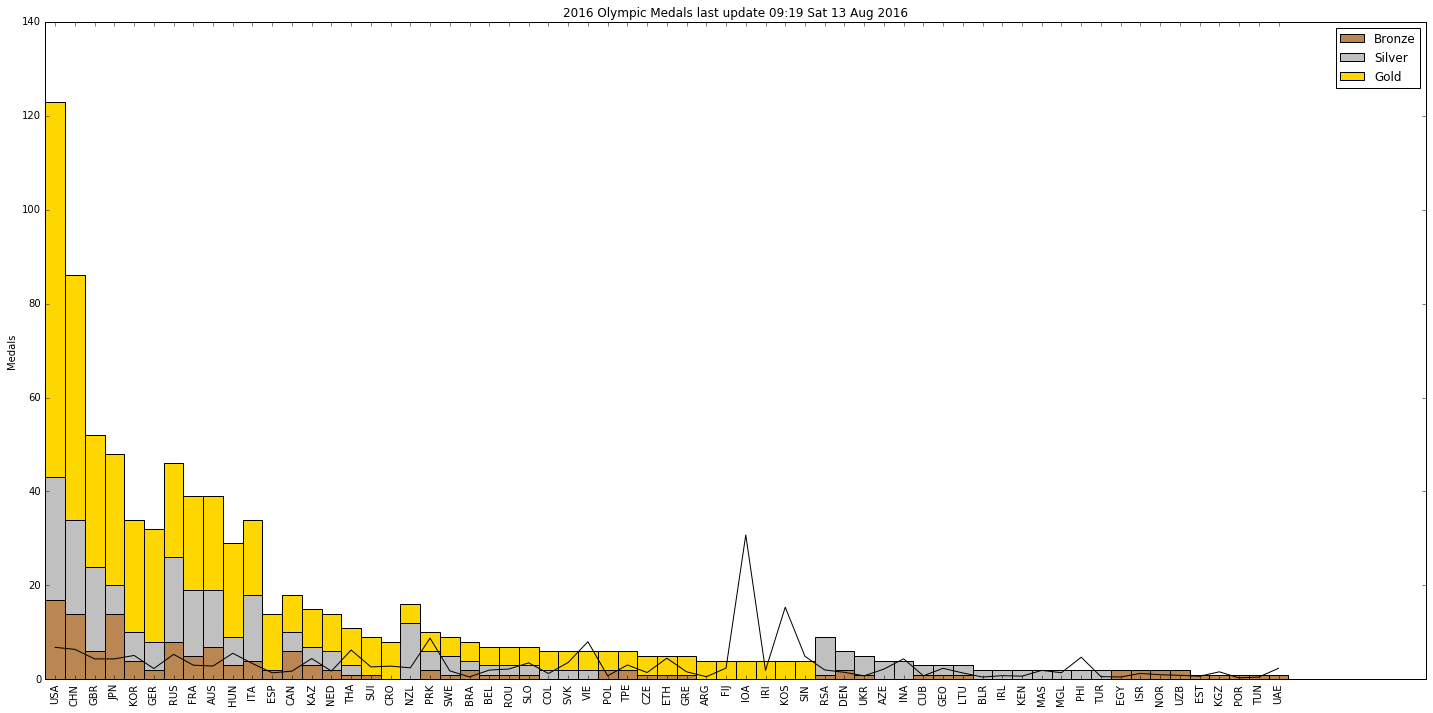

In [48]:
maxweighted = max([x[5] for  x in weighted])/4.0
maxweighted
byteamsize = {x[1]:x[5]*maxweighted/Teams[x[1]] for x in weighted}
PlotIt(weighted, byteamsize)


In [49]:
def GetMedalsForCode(code):
    """ Get the medals for a team code."""
    result = ("???", code, 0, 0, 0, 0)
    for x in Medals:
        if x[1] == code:
            result = x
    return result

code2name = {x[1]:x[0] for x in Medals}
byweight = sorted([(v,k) for (k,v) in byteamsize.iteritems()])
print "By weighted medals Vs team size"
print 'IOC, Country Team, Medals (G,S,B,T)'
for (m, c) in byweight[-1::-1]:
    r = GetMedalsForCode(c)
    print c, code2name.get(c, c), Teams[c], r[2:]


By weighted medals Vs team size
IOC, Country Team, Medals (G,S,B,T)
IOA Independent Olympic Athletes 4 [1, 0, 0, 1]
KOS Kosovo 8 [1, 0, 0, 1]
PRK North Korea 35 [1, 2, 2, 5]
VIE Vietnam 23 [1, 1, 0, 2]
USA United States 554 [20, 13, 17, 50]
CHN China 413 [13, 10, 14, 37]
THA Thailand 54 [2, 1, 1, 4]
HUN Hungary 160 [5, 3, 3, 11]
RUS Russia 265 [5, 9, 8, 22]
KOR South Korea 205 [6, 3, 4, 13]
SIN Singapore 25 [1, 0, 0, 1]
PHI Philippines 13 [0, 1, 0, 1]
ETH Ethiopia 34 [1, 0, 1, 2]
KAZ Kazakhstan 104 [2, 2, 3, 7]
INA Indonesia 28 [0, 2, 0, 2]
GBR Great Britain 366 [7, 9, 6, 22]
JPN Japan 338 [7, 3, 14, 24]
SVK Slovakia 51 [1, 1, 0, 2]
SLO Slovenia 61 [1, 1, 1, 3]
ITA Italy 309 [4, 7, 4, 15]
TPE Chinese Taipei 60 [1, 0, 2, 3]
FRA France 395 [5, 7, 5, 17]
AUS Australia 421 [5, 6, 7, 18]
CRO Croatia 87 [2, 0, 0, 2]
SUI Switzerland 104 [2, 0, 1, 3]
NZL New Zealand 199 [1, 6, 0, 7]
FIJ Fiji 51 [1, 0, 0, 1]
UAE United Arab Emirates 13 [0, 0, 1, 1]
GEO Georgia 39 [0, 1, 1, 2]
GER Germany 425 [6